In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: c:\Users\mirlo\workshop3


In [5]:
import pandas as pd 

In [2]:
from Database.conexion_db import create_connection
connection = create_connection()

Attempting to connect to the database...
Connection to MySQL database established successfully.


In [10]:
query = "SELECT * FROM predicciones;"
candidates = pd.read_sql(query, connection)
candidates.head()

C:\Users\mirlo\AppData\Local\Temp\ipykernel_20372\3362100017.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  candidates = pd.read_sql(query, connection)


,country_region,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,dystopia_residual,prediction
0,145.0,10.0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.51945
1,61.0,10.0,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.40521
2,38.0,10.0,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.23650
3,111.0,10.0,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.48009
4,25.0,5.0,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.35226


In [11]:
datos_felicidad = pd.read_csv(r'Data\datos_felicidad_total.csv', delimiter=',')

In [ ]:
print(query)

SELECT * FROM predicciones;


In [16]:
y_true = datos_felicidad['Score']
y_pred = candidates['prediction']

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


print('Gradient Boosting Regressor Performance Metrics:')

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

Gradient Boosting Regressor Performance Metrics:
MAE: 0.16152321910145948
MSE: 0.061222309408133425
R²: 0.9517757071150169


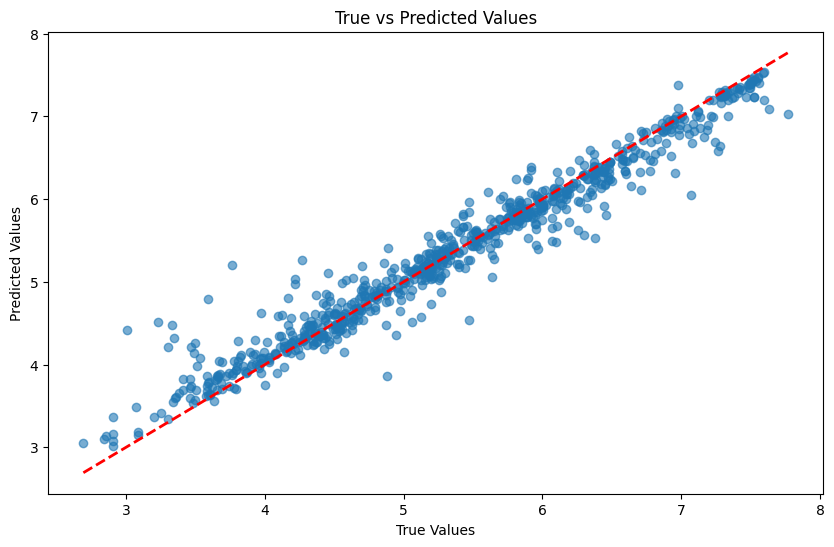

In [27]:
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

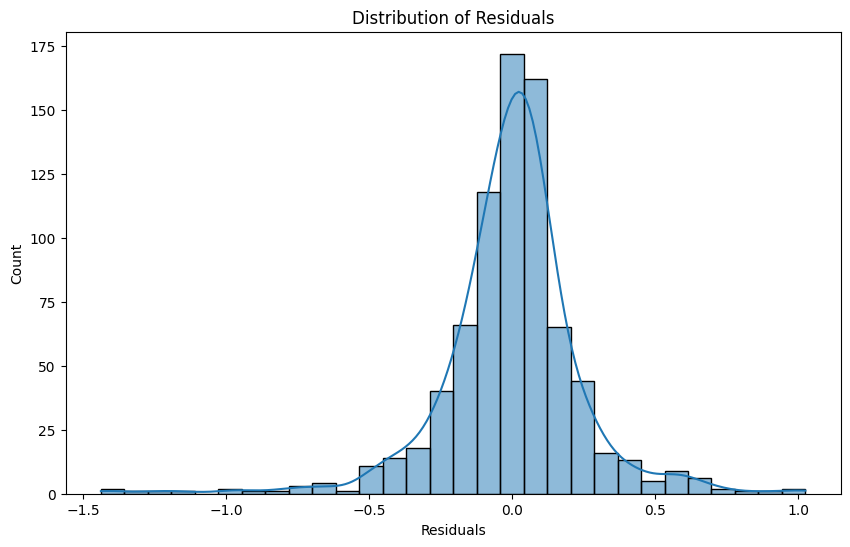

In [30]:
import seaborn as sns


plt.figure(figsize=(10, 6))
residuals = y_true - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

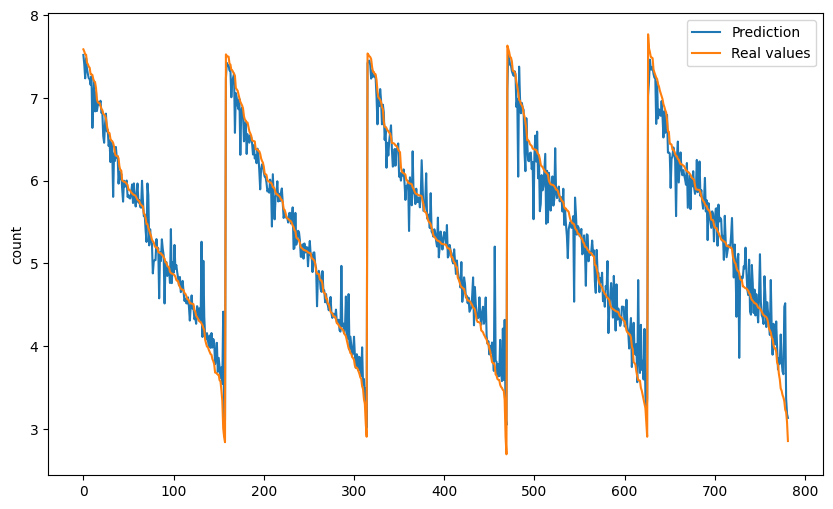

In [31]:
plt.figure(figsize = (10,6))

plt.plot(y_pred, label='Prediction')
plt.plot(y_true.values, label='Real values')
plt.ylabel('count')
plt.legend()
plt.show()